# DSC680 Project 2: Time Series Analysis on Germany's GDP & Birth Rate

In [1]:
# Load necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from neuralprophet import NeuralProphet

# Germany's GDP Analysis and Forecast GDP

In [2]:
# Read the 'World Bank GDP' dataset
df = pd.read_csv('World_Bank_GDP.csv')
df.head()

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,GDP per capita (current US$),NY.GDP.PCAP.CD,Australia,AUS,21853.44999,19681.64503,20290.78042,23705.90722,30819.99349,34460.543,...,68156.3861,62515.31483,56708.9612,49876.71238,53934.15437,57206.99067,54941.06572,51722.069,60444.50236,64491.42989
1,GDP per capita (current US$),NY.GDP.PCAP.CD,Austria,AUT,24625.60072,24558.76368,26527.59309,32294.04886,36889.23351,38417.45779,...,50731.12725,51786.37717,44195.81759,45307.58786,47429.15846,51466.55656,50070.40335,48809.22688,53637.70571,52131.44666
2,GDP per capita (current US$),NY.GDP.PCAP.CD,Belgium,BEL,23098.88651,23015.07126,25006.1914,30655.20927,35429.40779,36809.70134,...,46757.95186,47764.07151,41008.29672,42012.62272,44198.48239,47544.98115,46641.71166,45517.90382,51268.38804,49582.82536
3,GDP per capita (current US$),NY.GDP.PCAP.CD,Brazil,BRA,3726.81142,3142.235528,2824.715396,3056.64968,3623.223905,4773.26848,...,12258.56485,12071.40465,8783.214413,8680.735421,9896.717511,9121.020092,8845.323931,6923.700197,7696.785531,8917.673898
4,GDP per capita (current US$),NY.GDP.PCAP.CD,British Virgin Islands,VGB,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [3]:
df.describe()

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
count,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
unique,1,1,48,48,45,45,45,45,45,45,...,46,46,46,47,47,47,47,47,47,44
top,GDP per capita (current US$),NY.GDP.PCAP.CD,Australia,AUS,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
freq,48,48,1,1,4,4,4,4,4,4,...,3,3,3,2,2,2,2,2,2,5


In [4]:
# Drop rows where Country Code is not GERMANY (GER)
df = df.drop(df[df['Country Code'] != 'DEU'].index)

In [5]:
df.head()

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
14,GDP per capita (current US$),NY.GDP.PCAP.CD,Germany,DEU,23694.76048,23628.32721,25197.2656,30310.3576,34106.65812,34520.23965,...,46298.92292,48023.86998,41103.25644,42136.12079,44652.58917,47939.27829,46793.68676,46772.82535,51203.55447,48432.45587


In [6]:
# Drop columns that are not needed
df = df.drop(['Series Name', 'Series Code', 'Country Name','Country Name','Country Code'], axis=1)

In [7]:
# Rename the the fist column of dataframe to GDP
df = df.rename(columns={'Series Name': 'GDP' })

# Read the GDP dataframe
df.head()

,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
14,23694.76048,23628.32721,25197.2656,30310.3576,34106.65812,34520.23965,36353.88033,41640.08087,45612.71062,41650.36783,...,46298.92292,48023.86998,41103.25644,42136.12079,44652.58917,47939.27829,46793.68676,46772.82535,51203.55447,48432.45587


In [8]:
# Melt the dataframe
df = df.reset_index().rename(columns={'index':'id'})
df = pd.melt(df, id_vars=['id'], var_name='year', value_name='GDP')
df['year'] = df['year'].str.extract('(\d+)', expand=False).astype(int)

In [9]:
'''
df = df.reset_index().rename(columns={'index':'id'})

df = pd.melt(df, id_vars=['id'], var_name='year', value_name='GDP')
df['year'] = df['year'].str.extract('(\d+)', expand=False).astype(int)

#pivot_table = df.pivot_table(index='id', columns='year', values='value')
#print(pivot_table)
'''

"\ndf = df.reset_index().rename(columns={'index':'id'})\n\ndf = pd.melt(df, id_vars=['id'], var_name='year', value_name='GDP')\ndf['year'] = df['year'].str.extract('(\\d+)', expand=False).astype(int)\n\n#pivot_table = df.pivot_table(index='id', columns='year', values='value')\n#print(pivot_table)\n"

In [10]:
df.head(5)

,id,year,GDP
0,14,2000,23694.76048
1,14,2001,23628.32721
2,14,2002,25197.2656
3,14,2003,30310.3576
4,14,2004,34106.65812


In [11]:
# Change the 'year' column to read as a 'date'
df['year'] = pd.to_datetime(df['year'], format='%Y')
df['year'] = df['year'].dt.strftime('%Y-%m-%d')

In [12]:
# Drop the column for 'id'
df = df.drop(['id'], axis=1)

In [13]:
df.head(30)

,year,GDP
0,2000-01-01,23694.76048
1,2001-01-01,23628.32721
2,2002-01-01,25197.2656
3,2003-01-01,30310.3576
4,2004-01-01,34106.65812
5,2005-01-01,34520.23965
6,2006-01-01,36353.88033
7,2007-01-01,41640.08087
8,2008-01-01,45612.71062
9,2009-01-01,41650.36783


In [14]:
# Swap the columns
df = df[['GDP', 'year']]

In [15]:
df.head()

,GDP,year
0,23694.76048,2000-01-01
1,23628.32721,2001-01-01
2,25197.2656,2002-01-01
3,30310.3576,2003-01-01
4,34106.65812,2004-01-01


In [16]:
# Impute data for missing values
#df['GDP']=df['GDP'].fillna(method='ffill')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   GDP     23 non-null     object
 1   year    23 non-null     object
dtypes: object(2)
memory usage: 496.0+ bytes


In [18]:
# Chagne the data type to float and date
df['GDP'] = df['GDP'].astype(float)
df['year'] = pd.to_datetime(df['year'])

In [19]:
# Rename the dataframe with date and sales as 'ds' and 'y', respectively
df = df[["GDP","year"]]
df.rename(columns={"year": "ds","GDP":"y"}, inplace=True)

In [20]:
df.head()

,y,ds
0,23694.76048,2000-01-01
1,23628.32721,2001-01-01
2,25197.26560,2002-01-01
3,30310.35760,2003-01-01
4,34106.65812,2004-01-01


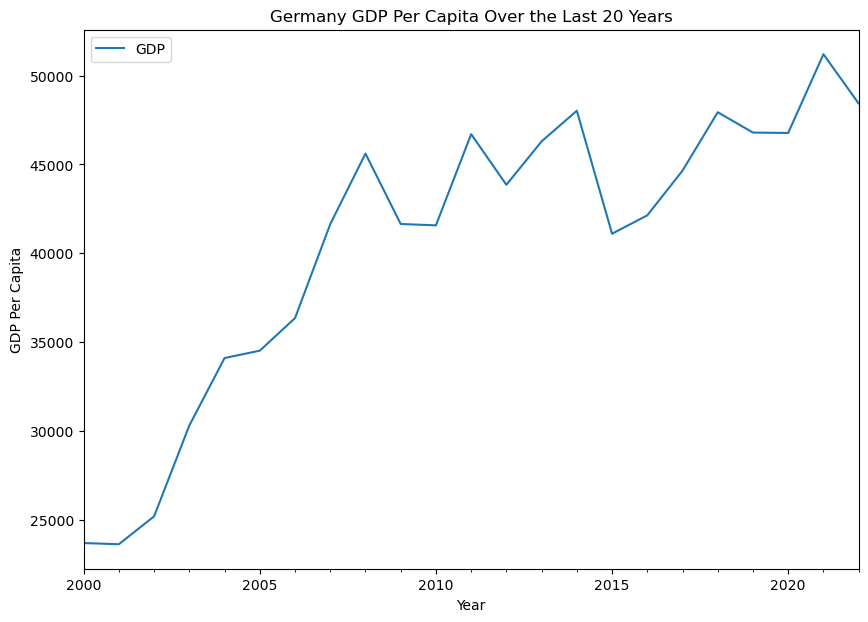

In [21]:
# 1. Plot the date for sales over time
ax = df.set_index('ds').plot(figsize=(10, 7))
ax.set_ylabel('GDP Per Capita')
ax.set_xlabel('Year')
ax.legend(['GDP'])

plt.title("Germany GDP Per Capita Over the Last 20 Years")
plt.show()

In [22]:
# 2. Split the data into a training and test set.  Use the last year of data (Jan 2022) of data as 
# your test set and the rest as your training set. 
df_train = df[df['ds'] < '2021-01-01']
df_test = df[df['ds'] >= '2021-01-01']

In [23]:
df_test.tail(10)

,y,ds
21,51203.55447,2021-01-01
22,48432.45587,2022-01-01


In [24]:
# 3. Use the training set to build a predictive model for the annual GDP for South Korea 

# Intialize the predictive model with Neural Prophet, using default variables

m = NeuralProphet(yearly_seasonality=True) 

#m = NeuralProphet(trend_reg=0, seasonality_reg = 0.01) 

#yearly_seasonality=True
# Fit the train data and the test data from #2 to the predictive model built w/ Neural Propet
metrics_train = m.fit(df=df_train, freq="Y")
metrics_test = m.test(df=df_test)

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 95.238% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 1000


  0%|          | 0/102 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.20E-02, min: 3.75E+00


  0%|          | 0/102 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.58E+01, min: 6.94E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 6.06E-01
Epoch[1000/1000]: 100%|█| 1000/1000 [00:04<00:00, 235.42it/s, SmoothL1Loss=0.001
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 100.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss      MAE     RMSE
1         0.003 1879.059 1927.114


INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 95.238% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 1000
Epoch[1000/1000]: 100%|█| 1000/1000 [00:06<00:00, 154.98it/s, SmoothL1Loss=0.001
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 95.652% of the data.
INFO - (NP.df_uti

Text(0.5, 1.0, 'Germany GDP Forecast')

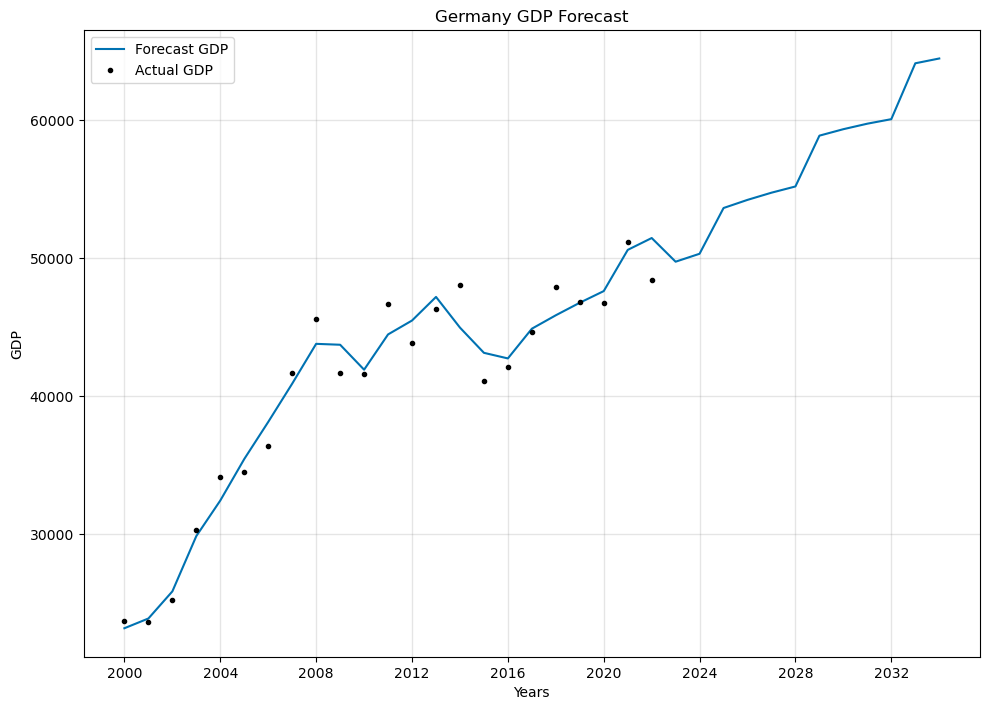

In [25]:
# 4. Use the model to predict the annual GDP on the last year of data 2021
m = NeuralProphet(trend_reg=0, seasonality_reg = 0.01, seasonality_mode="multiplicative", learning_rate=0.1)
metrics_train2 = m.fit(df=df_train, freq="Y")
future = m.make_future_dataframe(df, periods=12, n_historic_predictions=96)
forecast = m.predict(future)

#fig.legend(['Forecast GDP','Actual GDP'])
fig, ax = plt.subplots(figsize=(10,7))
m.plot(forecast, xlabel="Years", ylabel="GDP", ax=ax)
ax.legend(['Forecast GDP','Actual GDP'])
plt.title('Germany GDP Forecast')


In [26]:
metrics_train.tail(10)

,SmoothL1Loss,MAE,RMSE,RegLoss
990,0.001689,1141.258359,1401.509905,0.0
991,0.001689,1141.213908,1412.771310,0.0
992,0.001689,1141.224877,1376.760928,0.0
993,0.001689,1141.306652,1413.052136,0.0
994,0.001689,1141.389968,1412.973755,0.0
995,0.001689,1141.404759,1382.843474,0.0
996,0.001689,1141.402355,1410.826184,0.0
997,0.001689,1141.397316,1413.120600,0.0
998,0.001689,1141.396944,1382.323887,0.0
999,0.001689,1141.394618,1408.854777,0.0


In [27]:
# Make future GDP forecast dataframe
future = m.make_future_dataframe(df, periods=24, n_historic_predictions=96)
forecast = m.predict(future)
forecast

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
WARNING - (NP.forecaster._make_future_dataframe) - Insufficient data for 96 historic forecasts, reduced to 23.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/lib/python3.9/site-packages/neuralprophet/forecaster.py:2060: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(future_df)

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 95.745% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 95.745% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/li

,ds,y,yhat1,residual1,trend,season_yearly
0,2000-01-01,23694.76048,23158.025391,-536.735089,23338.037109,0.620100
1,2001-01-01,23628.32721,23865.193359,236.866149,23765.615234,0.725342
2,2002-01-01,25197.26560,25831.818359,634.552759,24931.585938,0.690755
3,2003-01-01,30310.35760,29844.447266,-465.910334,27382.777344,0.655668
4,2004-01-01,34106.65812,32420.693359,-1685.964761,29055.378906,0.620100
5,2005-01-01,34520.23965,35437.640625,917.400975,30472.949219,0.725342
6,2006-01-01,36353.88033,38125.738281,1771.857951,32202.847656,0.690755
7,2007-01-01,41640.08087,40901.832031,-738.248839,34061.281250,0.655668
8,2008-01-01,45612.71062,43790.480469,-1822.230151,36073.328125,0.620100
9,2009-01-01,41650.36783,43724.710938,2074.343107,35276.093750,0.725342


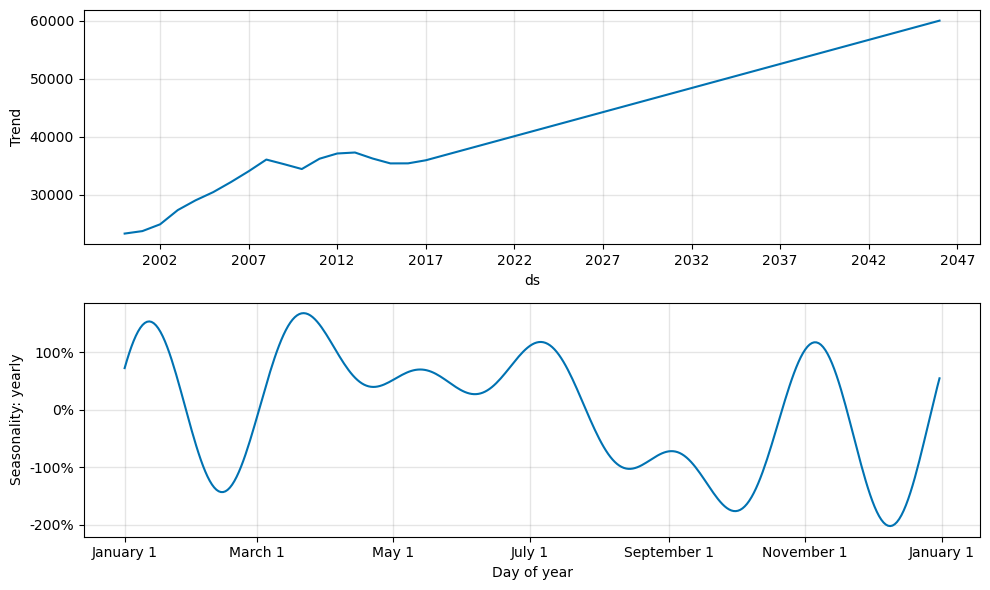

In [28]:
# 4a. Show the seasonality as a percent of the trend
fig_param = m.plot_components(forecast)

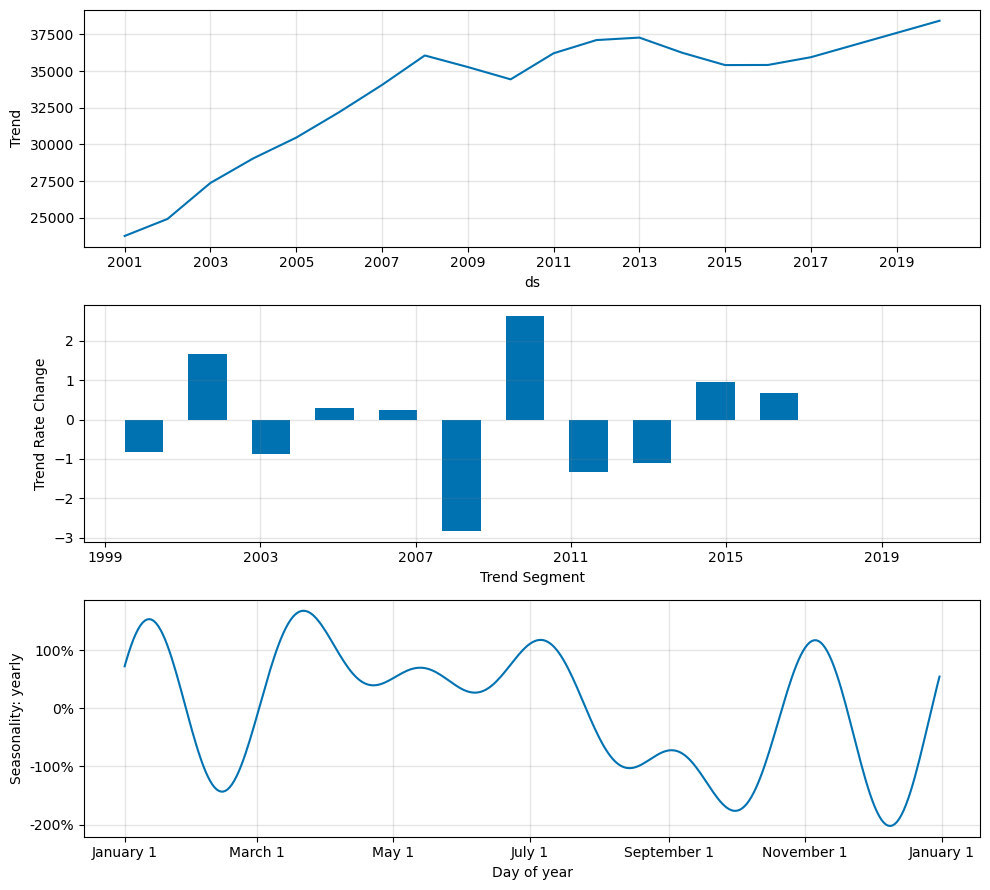

In [29]:
# Visualize the model parameters
fig_model = m.plot_parameters()

In [30]:
# 5. Report the RMSE of the model predictions on the test set
metrics_test

,SmoothL1Loss,MAE,RMSE
0,0.003142,1879.058594,1927.113892


In [31]:
# Make a dataframe for 'forecast dataset'
df_GDP = forecast

# Fill the NaN with the value before the last
df_GDP[['y','residual1']]=df_GDP[['y','residual1']].fillna(method='ffill')

In [32]:
df_GDP.tail()

,ds,y,yhat1,residual1,trend,season_yearly
42,2041-12-31,48432.45587,74750.406250,3034.997255,56661.503906,0.547598
43,2042-12-31,48432.45587,74782.351562,3034.997255,57489.437500,0.510701
44,2043-12-31,48432.45587,74739.187500,3034.997255,58317.371094,0.473401
45,2044-12-31,48432.45587,79893.312500,3034.997255,59147.562500,0.584071
46,2045-12-31,48432.45587,79879.132812,3034.997255,59975.496094,0.547598


In [33]:
# Save the GDP forecast/prediction as a csv file
path = "/Users/philshan/Documents/GitHub/DSC680/GER_GDP_Forecast.csv"

df_GDP.to_csv(path, index=False)

In [34]:
# Read the 'World Bank GDP' dataset
df_birth = pd.read_csv('World_Bank_Birthrate.csv')
df_birth.head()

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,Australia,AUS,1.756,1.739,1.756,1.748,1.768,1.807,...,1.855,1.826,1.814,1.752,1.741,1.74,1.657,1.581,1.7,..
1,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,Austria,AUT,1.36,1.33,1.39,1.38,1.42,1.41,...,1.44,1.46,1.49,1.53,1.52,1.47,1.46,1.44,1.48,..
2,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,Belgium,BEL,1.67,1.67,1.65,1.67,1.72,1.76,...,1.76,1.74,1.7,1.68,1.65,1.62,1.6,1.55,1.6,..
3,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,Brazil,BRA,2.255,2.183,2.103,2.023,2.002,1.974,...,1.748,1.767,1.777,1.709,1.736,1.749,1.703,1.649,1.641,..
4,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,British Virgin Islands,VGB,1.866,1.505,1.24,1.306,1.505,1.341,...,1.08,1.237,1.186,0.987,0.872,0.917,0.948,0.976,1.005,..


In [35]:
# Drop rows where Country Code is not GERMANY (DEU)
df_birth = df_birth.drop(df_birth[df_birth['Country Code'] != 'DEU'].index)

In [36]:
df_birth.head()

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
14,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,Germany,DEU,1.38,1.35,1.34,1.34,1.36,1.34,...,1.42,1.47,1.5,1.6,1.57,1.57,1.54,1.53,1.58,..


In [37]:
# Drop columns that are not needed
df_birth = df_birth.drop(['Series Name', 'Series Code', 'Country Name','Country Code'], axis=1)

In [38]:
# Rename the the fist column of dataframe to GDP
df_birth = df_birth.rename(columns={'Series Name': 'Birth_Rate' })

In [39]:
# Read the GDP dataframe
df_birth.head()

,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
14,1.38,1.35,1.34,1.34,1.36,1.34,1.33,1.37,1.38,1.36,...,1.42,1.47,1.5,1.6,1.57,1.57,1.54,1.53,1.58,..


In [40]:
# Melt the dataframe
df_birth = df_birth.reset_index().rename(columns={'index':'id'})
df_birth = pd.melt(df_birth, id_vars=['id'], var_name='year', value_name='Birth')
df_birth['year'] = df_birth['year'].str.extract('(\d+)', expand=False).astype(int)

In [41]:
# Check the new dataframe for birthrate
df_birth.head(25)

,id,year,Birth
0,14,2000,1.38
1,14,2001,1.35
2,14,2002,1.34
3,14,2003,1.34
4,14,2004,1.36
5,14,2005,1.34
6,14,2006,1.33
7,14,2007,1.37
8,14,2008,1.38
9,14,2009,1.36


In [42]:
# Change the 'year' column to read as a 'date'
df_birth['year'] = pd.to_datetime(df_birth['year'], format='%Y')
df_birth['year'] = df_birth['year'].dt.strftime('%Y-%m-%d')

In [43]:
# Drop the column for 'id'
df_birth = df_birth.drop(['id'], axis=1)

In [44]:
df_birth.tail(5)

,year,Birth
18,2018-01-01,1.57
19,2019-01-01,1.54
20,2020-01-01,1.53
21,2021-01-01,1.58
22,2022-01-01,..


In [45]:
df_birth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    23 non-null     object
 1   Birth   23 non-null     object
dtypes: object(2)
memory usage: 496.0+ bytes


In [46]:
df_birth['Birth'].str.replace(r'\..','0').astype(float)
df_birth.tail()

WARNING - (py.warnings._showwarnmsg) - /var/folders/dq/pk6vhlb94kl10cjryr47z9sw0000gn/T/ipykernel_16211/734646817.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_birth['Birth'].str.replace(r'\..','0').astype(float)



,year,Birth
18,2018-01-01,1.57
19,2019-01-01,1.54
20,2020-01-01,1.53
21,2021-01-01,1.58
22,2022-01-01,..


In [47]:
# Chagne the data type to float and date
df_birth['Birth'] = pd.to_numeric(df_birth['Birth'], errors='coerce')
df_birth['year'] = pd.to_datetime(df_birth['year'])

In [48]:
df_birth.tail()

,year,Birth
18,2018-01-01,1.57
19,2019-01-01,1.54
20,2020-01-01,1.53
21,2021-01-01,1.58
22,2022-01-01,NaN


In [49]:
# Fill the NaN with the value before the last
df_birth['Birth']=df_birth['Birth'].fillna(method='ffill')

In [50]:
df_birth.tail()

,year,Birth
18,2018-01-01,1.57
19,2019-01-01,1.54
20,2020-01-01,1.53
21,2021-01-01,1.58
22,2022-01-01,1.58


In [51]:
df_birth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    23 non-null     datetime64[ns]
 1   Birth   23 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 496.0 bytes


In [52]:
# Rename the dataframe with date and sales as 'ds' and 'y', respectively
df_birth = df_birth[["Birth","year"]]
df_birth.rename(columns={"year": "ds","Birth":"y"}, inplace=True)

In [53]:
df_birth.head()

,y,ds
0,1.38,2000-01-01
1,1.35,2001-01-01
2,1.34,2002-01-01
3,1.34,2003-01-01
4,1.36,2004-01-01


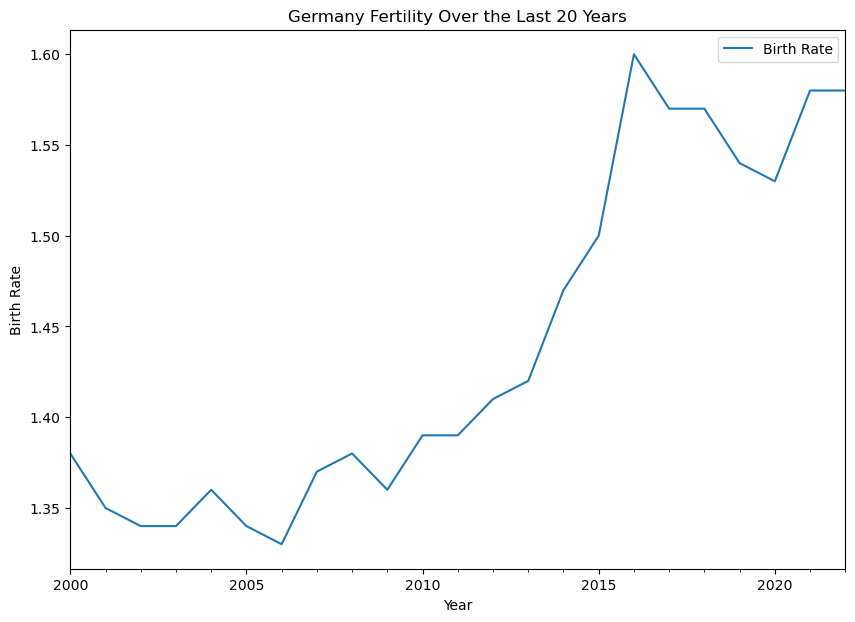

In [54]:
# 1. Plot the date for sales over time
ax = df_birth.set_index('ds').plot(figsize=(10, 7))
ax.set_ylabel('Birth Rate')
ax.set_xlabel('Year')
ax.legend(['Birth Rate'])

plt.title("Germany Fertility Over the Last 20 Years")
plt.show()

In [55]:
# 2a. Split the data into a training and test set.  Use the last year of data (Jan 2022) of data as 
# your test set and the rest as your training set. 
df_train1 = df_birth[df_birth['ds'] < '2021-01-01']
df_test1 = df_birth[df_birth['ds'] >= '2021-01-01']

In [56]:
df_test1.head(30)

,y,ds
21,1.58,2021-01-01
22,1.58,2022-01-01


In [57]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 21 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   y       2 non-null      float64       
 1   ds      2 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 48.0 bytes


In [60]:
# 3a. Use the training set to build a predictive model for the annual Birthrate for South Korea 

# Intialize the predictive model with Neural Prophet, using default variables
m = NeuralProphet(
yearly_seasonality=True)  

# Fit the train data and the test data from #2 to the predictive model built w/ Neural Propet
metrics_train = m.fit(df=df_train1, freq="Y")
metrics_test = m.test(df=df_test1)

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 95.238% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 1000


  0%|          | 0/102 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.20E-02, min: 3.06E+00


  0%|          | 0/102 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.20E-02, min: 3.06E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 7.27E-02
Epoch[1000/1000]: 100%|█| 1000/1000 [00:04<00:00, 237.12it/s, SmoothL1Loss=0.000
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 100.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE   RMSE
1         0.086  0.099  0.100


INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 95.238% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 1000
Epoch[1000/1000]: 100%|█| 1000/1000 [00:04<00:00, 235.75it/s, SmoothL1Loss=0.000
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
WARNING - (NP.forecaster._

Text(0.5, 1.0, 'Germany Birth Rate Forecast')

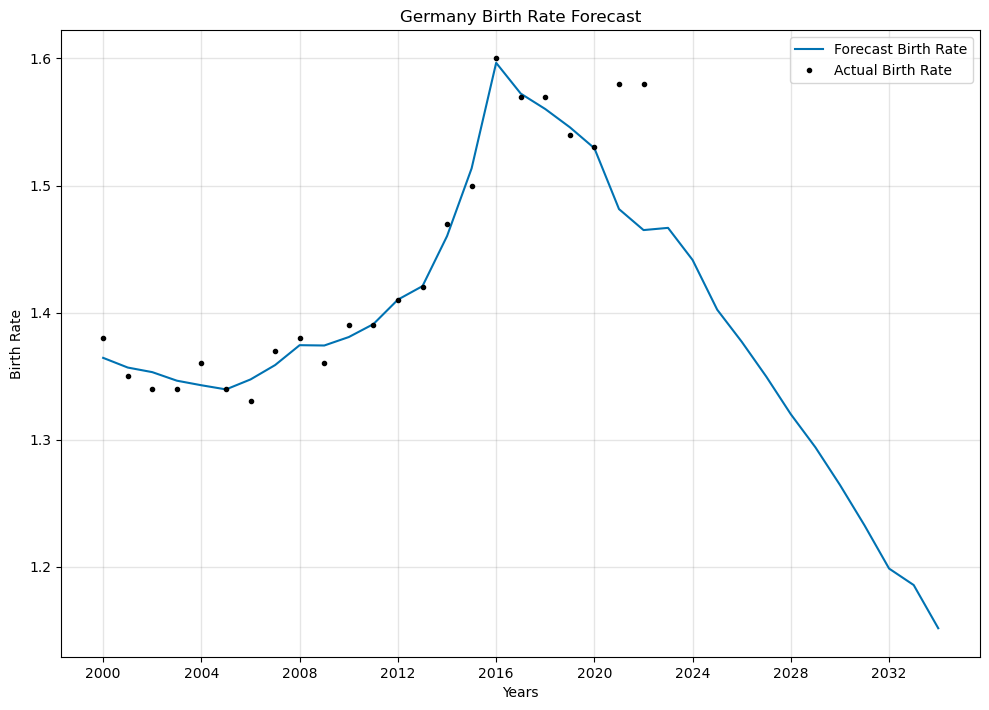

In [61]:
# 4a. Use the model to predict the annual Birth Rate on the last year of data 2021
m = NeuralProphet(seasonality_mode="multiplicative", learning_rate=0.1)
metrics_train2 = m.fit(df=df_train1, freq="Y")
future = m.make_future_dataframe(df_birth, periods=12, n_historic_predictions=48)
forecast = m.predict(future)

#fig.legend(['Forecast Birthrate','Actual Birthrate'])
fig, ax = plt.subplots(figsize=(10,7))
m.plot(forecast, xlabel="Years", ylabel="Birth Rate", ax=ax)
ax.legend(['Forecast Birth Rate','Actual Birth Rate'])
plt.title('Germany Birth Rate Forecast')

In [62]:
metrics_train.tail(10)

,SmoothL1Loss,MAE,RMSE,RegLoss
990,0.000615,0.007141,0.008419,0.0
991,0.000615,0.007141,0.008114,0.0
992,0.000615,0.007141,0.008351,0.0
993,0.000615,0.007141,0.008331,0.0
994,0.000615,0.007141,0.008137,0.0
995,0.000615,0.007141,0.008275,0.0
996,0.000615,0.007141,0.008303,0.0
997,0.000615,0.007141,0.008404,0.0
998,0.000615,0.007141,0.008395,0.0
999,0.000615,0.007141,0.008320,0.0


In [63]:
# Make future birthrate forecast dataframe
future1 = m.make_future_dataframe(df_birth, periods=24, n_historic_predictions=96)
forecast1 = m.predict(future1)
forecast1

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
WARNING - (NP.forecaster._make_future_dataframe) - Insufficient data for 96 historic forecasts, reduced to 23.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/lib/python3.9/site-packages/neuralprophet/forecaster.py:2060: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(future_df)

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 95.745% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 95.745% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/li

,ds,y,yhat1,residual1,trend,season_yearly
0,2000-01-01,1.38,1.364307,-0.015693,1.361016,0.106086
1,2001-01-01,1.35,1.356681,0.006681,1.357601,-0.033344
2,2002-01-01,1.34,1.353057,0.013057,1.352759,0.013114
3,2003-01-01,1.34,1.346341,0.006341,1.345422,0.059598
4,2004-01-01,1.36,1.342733,-0.017267,1.341511,0.106086
5,2005-01-01,1.34,1.339474,-0.000526,1.339800,-0.033344
6,2006-01-01,1.33,1.347335,0.017335,1.347110,0.013114
7,2007-01-01,1.37,1.358633,-0.011367,1.357023,0.059598
8,2008-01-01,1.38,1.374294,-0.005706,1.370045,0.106086
9,2009-01-01,1.36,1.374039,0.014039,1.375558,-0.033344


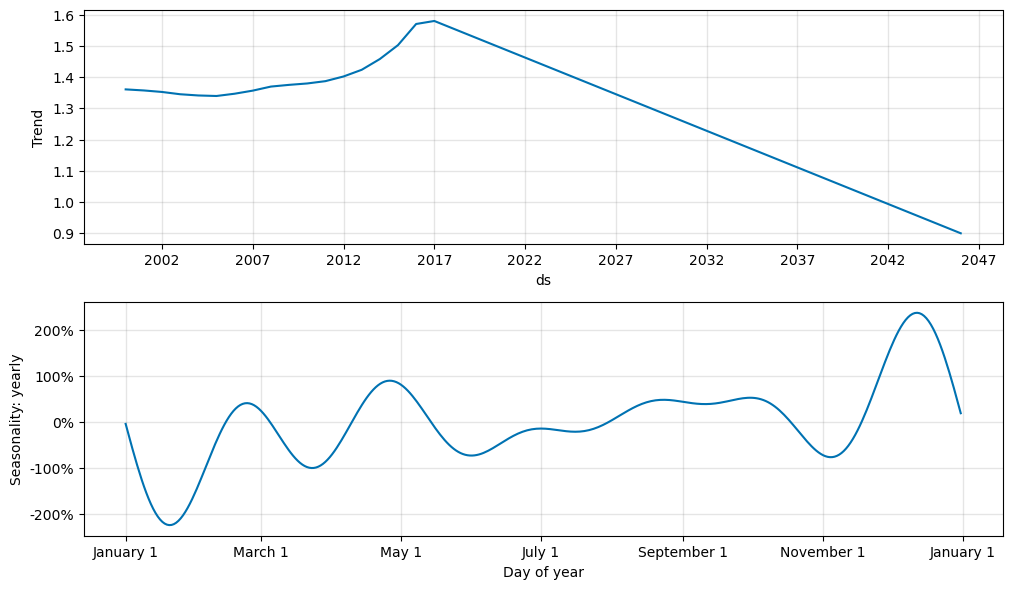

In [64]:
# 4a. Show the seasonality as a percent of the trend
fig_param = m.plot_components(forecast1)

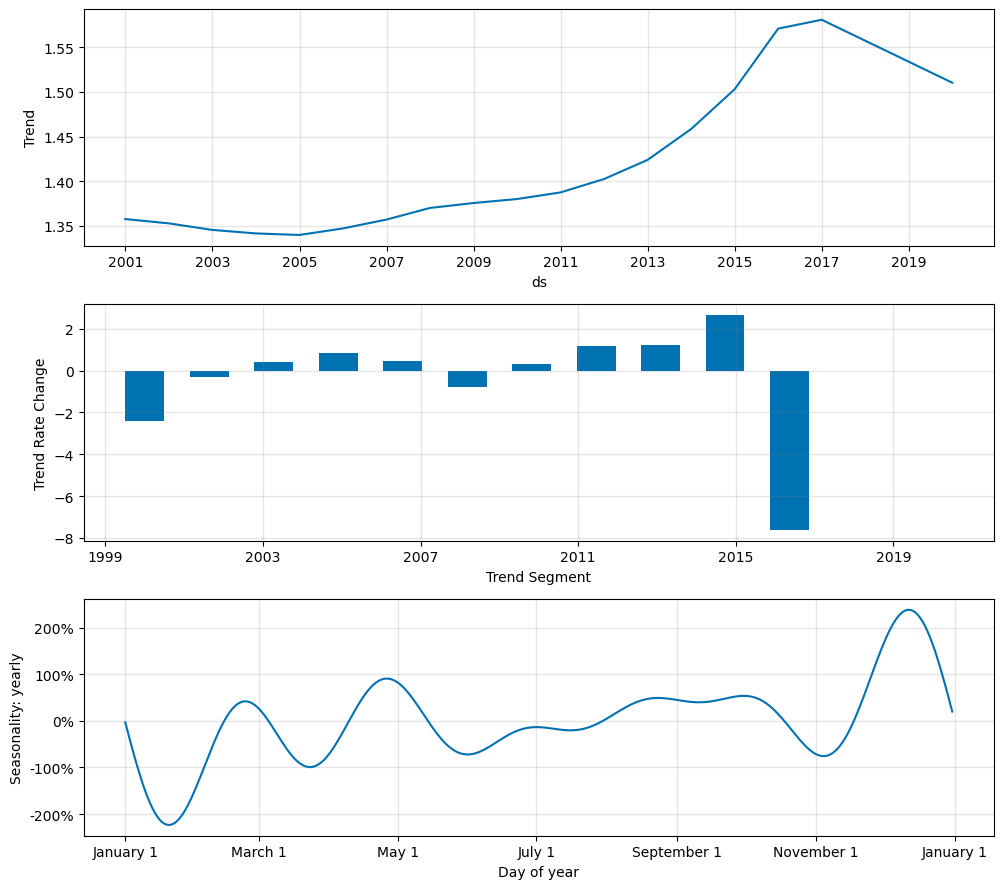

In [65]:
# Visualize the model parameters
fig_model = m.plot_parameters()

In [66]:
# 5a. Report the RMSE of the model predictions on the test set
metrics_test

,SmoothL1Loss,MAE,RMSE
0,0.085943,0.099251,0.099502


In [67]:
# Make a dataframe for 'forecast1 dataset'
df_birth1 = forecast1

# Fill the NaN with the value before the last
df_birth1[['y','residual1']]=df_birth1[['y','residual1']].fillna(method='ffill')

In [68]:
# Check the updated dataframe for the predicted data for birth rate
df_birth1.tail()

,ds,y,yhat1,residual1,trend,season_yearly
42,2041-12-31,1.58,0.925920,-0.115097,0.992986,0.199001
43,2042-12-31,1.58,0.881026,-0.115097,0.969491,0.245388
44,2043-12-31,1.58,0.833979,-0.115097,0.945995,0.291703
45,2044-12-31,1.58,0.860257,-0.115097,0.922435,0.152560
46,2045-12-31,1.58,0.813158,-0.115097,0.898939,0.199001


In [69]:
# Save the birthrate forecast/prediction as a csv file

path = "/Users/philshan/Documents/GitHub/DSC680/GER_Birthrate_Forecast.csv"

df_birth1.to_csv(path, index=False)

In [70]:
'''
# save predictions to a csv in google drive
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/My Drive/GDP_forecast.csv'
'''

"\n# save predictions to a csv in google drive\nfrom google.colab import drive\n\ndrive.mount('/content/drive')\npath = '/content/drive/My Drive/GDP_forecast.csv'\n"

In [71]:
# Read the new prediction 'World Bank GDP' dataset
gdp_df = pd.read_csv('GER_GDP_Forecast.csv')
gdp_df.head(100)

,ds,y,yhat1,residual1,trend,season_yearly
0,2000-01-01,23694.76048,23158.025391,-536.735089,23338.037109,0.620100
1,2001-01-01,23628.32721,23865.193359,236.866149,23765.615234,0.725342
2,2002-01-01,25197.26560,25831.818359,634.552759,24931.585938,0.690755
3,2003-01-01,30310.35760,29844.447266,-465.910334,27382.777344,0.655668
4,2004-01-01,34106.65812,32420.693359,-1685.964761,29055.378906,0.620100
5,2005-01-01,34520.23965,35437.640625,917.400975,30472.949219,0.725342
6,2006-01-01,36353.88033,38125.738281,1771.857951,32202.847656,0.690755
7,2007-01-01,41640.08087,40901.832031,-738.248839,34061.281250,0.655668
8,2008-01-01,45612.71062,43790.480469,-1822.230151,36073.328125,0.620100
9,2009-01-01,41650.36783,43724.710938,2074.343107,35276.093750,0.725342


In [72]:
# Change the columns heads for the new GDP dataset
gdp_df.rename({'y': 'GDP','yhat1':'pred_GDP'}, axis= "columns", inplace = True)

In [73]:
# Check the new headers for the new GDP dataset 
gdp_df.head()

,ds,GDP,pred_GDP,residual1,trend,season_yearly
0,2000-01-01,23694.76048,23158.025391,-536.735089,23338.037109,0.620100
1,2001-01-01,23628.32721,23865.193359,236.866149,23765.615234,0.725342
2,2002-01-01,25197.26560,25831.818359,634.552759,24931.585938,0.690755
3,2003-01-01,30310.35760,29844.447266,-465.910334,27382.777344,0.655668
4,2004-01-01,34106.65812,32420.693359,-1685.964761,29055.378906,0.620100


In [74]:
# Read the new prediction 'World Bank Birthrate' dataset
br_df = pd.read_csv('GER_Birthrate_Forecast.csv')
br_df.head(120)

,ds,y,yhat1,residual1,trend,season_yearly
0,2000-01-01,1.38,1.364307,-0.015693,1.361016,0.106086
1,2001-01-01,1.35,1.356681,0.006681,1.357601,-0.033344
2,2002-01-01,1.34,1.353057,0.013057,1.352759,0.013114
3,2003-01-01,1.34,1.346341,0.006341,1.345422,0.059598
4,2004-01-01,1.36,1.342733,-0.017267,1.341511,0.106086
5,2005-01-01,1.34,1.339474,-0.000526,1.339800,-0.033344
6,2006-01-01,1.33,1.347335,0.017335,1.347110,0.013114
7,2007-01-01,1.37,1.358633,-0.011367,1.357023,0.059598
8,2008-01-01,1.38,1.374294,-0.005706,1.370045,0.106086
9,2009-01-01,1.36,1.374039,0.014039,1.375558,-0.033344


In [75]:
# Change the columns heads for the new birthrate dataset
br_df.rename({'y': 'birth_rate','yhat1':'pred_birth_rate'}, axis= "columns", inplace = True)
br_df.head()

,ds,birth_rate,pred_birth_rate,residual1,trend,season_yearly
0,2000-01-01,1.38,1.364307,-0.015693,1.361016,0.106086
1,2001-01-01,1.35,1.356681,0.006681,1.357601,-0.033344
2,2002-01-01,1.34,1.353057,0.013057,1.352759,0.013114
3,2003-01-01,1.34,1.346341,0.006341,1.345422,0.059598
4,2004-01-01,1.36,1.342733,-0.017267,1.341511,0.106086


In [76]:
# Merge the new GDP ("gdp_df") dataset with the new Birthrate ()"br_df) dataset
new_df = pd.merge(gdp_df, br_df, on='ds')

In [77]:
# Check the new 'merged' dataset called 'new_df'
new_df.head(120)

,ds,GDP,pred_GDP,residual1_x,trend_x,season_yearly_x,birth_rate,pred_birth_rate,residual1_y,trend_y,season_yearly_y
0,2000-01-01,23694.76048,23158.025391,-536.735089,23338.037109,0.620100,1.38,1.364307,-0.015693,1.361016,0.106086
1,2001-01-01,23628.32721,23865.193359,236.866149,23765.615234,0.725342,1.35,1.356681,0.006681,1.357601,-0.033344
2,2002-01-01,25197.26560,25831.818359,634.552759,24931.585938,0.690755,1.34,1.353057,0.013057,1.352759,0.013114
3,2003-01-01,30310.35760,29844.447266,-465.910334,27382.777344,0.655668,1.34,1.346341,0.006341,1.345422,0.059598
4,2004-01-01,34106.65812,32420.693359,-1685.964761,29055.378906,0.620100,1.36,1.342733,-0.017267,1.341511,0.106086
5,2005-01-01,34520.23965,35437.640625,917.400975,30472.949219,0.725342,1.34,1.339474,-0.000526,1.339800,-0.033344
6,2006-01-01,36353.88033,38125.738281,1771.857951,32202.847656,0.690755,1.33,1.347335,0.017335,1.347110,0.013114
7,2007-01-01,41640.08087,40901.832031,-738.248839,34061.281250,0.655668,1.37,1.358633,-0.011367,1.357023,0.059598
8,2008-01-01,45612.71062,43790.480469,-1822.230151,36073.328125,0.620100,1.38,1.374294,-0.005706,1.370045,0.106086
9,2009-01-01,41650.36783,43724.710938,2074.343107,35276.093750,0.725342,1.36,1.374039,0.014039,1.375558,-0.033344


In [78]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 46
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ds               47 non-null     object 
 1   GDP              47 non-null     float64
 2   pred_GDP         47 non-null     float64
 3   residual1_x      47 non-null     float64
 4   trend_x          47 non-null     float64
 5   season_yearly_x  47 non-null     float64
 6   birth_rate       47 non-null     float64
 7   pred_birth_rate  47 non-null     float64
 8   residual1_y      47 non-null     float64
 9   trend_y          47 non-null     float64
 10  season_yearly_y  47 non-null     float64
dtypes: float64(10), object(1)
memory usage: 4.4+ KB


In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split #used to split data into training/test sets
from sklearn.metrics import plot_confusion_matrix

In [80]:
# Figure 1-Scatter plot with regression betweein GDP_Predict and Birthrate_Predict
#sns.lmplot(x='GDP', y='birth', data=new_df).set(title='A Scatter Chart with Regression Between GDP and Birth')

In [81]:
new_df.head(5)

,ds,GDP,pred_GDP,residual1_x,trend_x,season_yearly_x,birth_rate,pred_birth_rate,residual1_y,trend_y,season_yearly_y
0,2000-01-01,23694.76048,23158.025391,-536.735089,23338.037109,0.620100,1.38,1.364307,-0.015693,1.361016,0.106086
1,2001-01-01,23628.32721,23865.193359,236.866149,23765.615234,0.725342,1.35,1.356681,0.006681,1.357601,-0.033344
2,2002-01-01,25197.26560,25831.818359,634.552759,24931.585938,0.690755,1.34,1.353057,0.013057,1.352759,0.013114
3,2003-01-01,30310.35760,29844.447266,-465.910334,27382.777344,0.655668,1.34,1.346341,0.006341,1.345422,0.059598
4,2004-01-01,34106.65812,32420.693359,-1685.964761,29055.378906,0.620100,1.36,1.342733,-0.017267,1.341511,0.106086


In [82]:
#new_df['ds'] = pd.to_datetime(new_df['ds'])

In [83]:
#new_df['ds'] = pd.to_datetime(new_df['ds']).astype(int) / 10**9

In [84]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 46
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ds               47 non-null     object 
 1   GDP              47 non-null     float64
 2   pred_GDP         47 non-null     float64
 3   residual1_x      47 non-null     float64
 4   trend_x          47 non-null     float64
 5   season_yearly_x  47 non-null     float64
 6   birth_rate       47 non-null     float64
 7   pred_birth_rate  47 non-null     float64
 8   residual1_y      47 non-null     float64
 9   trend_y          47 non-null     float64
 10  season_yearly_y  47 non-null     float64
dtypes: float64(10), object(1)
memory usage: 4.4+ KB


In [85]:
'''
from sklearn.impute import KNNImputer

# create an instance of the KNNImputer class
imputer = KNNImputer(n_neighbors=5)

# perform KNN imputation on the dataframe
#new_df[['GDP','residual1_x','birth','residual1_y']] = imputer.fit_transform(new_df[['GDP','residual1_x','birth','residual1_y']])
imputed_df = imputer.fit_transform(new_df)
'''

"\nfrom sklearn.impute import KNNImputer\n\n# create an instance of the KNNImputer class\nimputer = KNNImputer(n_neighbors=5)\n\n# perform KNN imputation on the dataframe\n#new_df[['GDP','residual1_x','birth','residual1_y']] = imputer.fit_transform(new_df[['GDP','residual1_x','birth','residual1_y']])\nimputed_df = imputer.fit_transform(new_df)\n"

In [86]:
#new_df.head(100)

In [87]:
'''
new_df = pd.DataFrame(imputed_df)
new_df.head(100)
'''

'\nnew_df = pd.DataFrame(imputed_df)\nnew_df.head(100)\n'

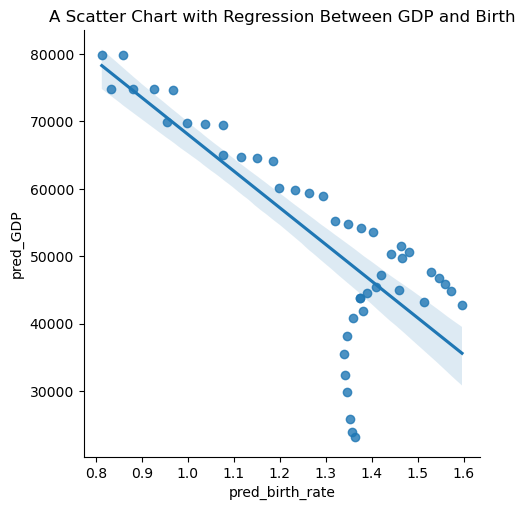

In [88]:
# Figure 1-Scatter plot with regression betweein GDP_Predict and Birthrate_Predict
sns.lmplot(x='pred_birth_rate', y='pred_GDP', data=new_df).set(title='A Scatter Chart with Regression Between GDP and Birth')

Text(0.5, 1.0, 'Correlation Heatmap Between GDP and Birthrate')

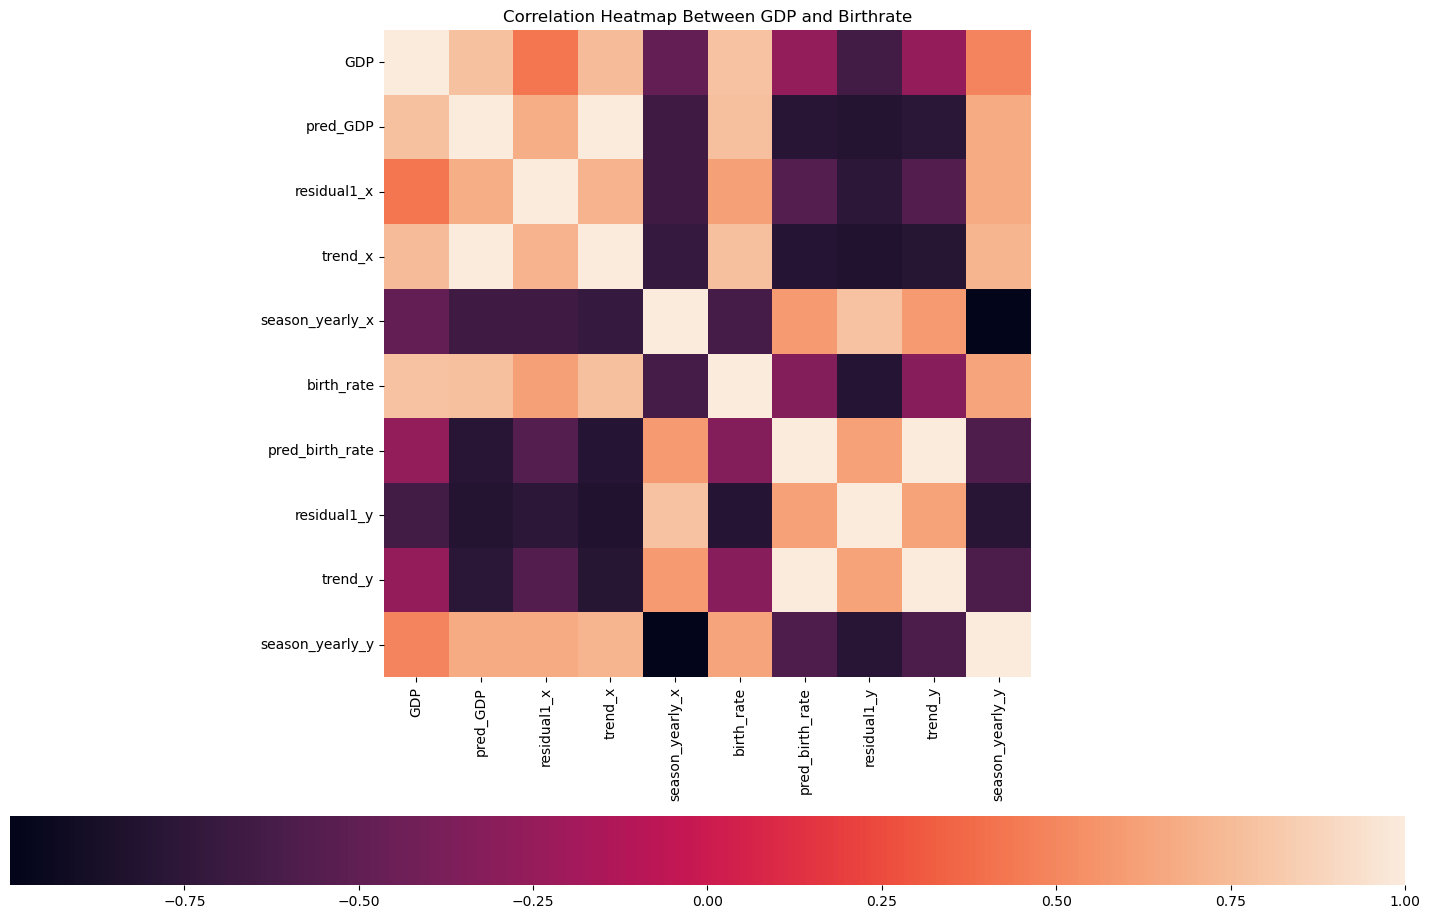

In [89]:
# Create a correlation heatmap, Figure 4.
fig, ax=plt.subplots(figsize=(18,12))

sns.heatmap(new_df.corr(), cbar_kws={'orientation':'horizontal'}, square=True)
plt.title("Correlation Heatmap Between GDP and Birthrate")

In [90]:
# The Ordinary Least Squares (OLS) Regression Analysis 

import pandas as pd
import numpy as np
import statsmodels.api as sm


X = new_df['pred_birth_rate']
y = new_df['pred_GDP']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               pred_GDP   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     72.82
Date:                Sun, 30 Jul 2023   Prob (F-statistic):           5.84e-11
Time:                        00:43:13   Log-Likelihood:                -495.19
No. Observations:                  47   AIC:                             994.4
Df Residuals:                      45   BIC:                             998.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.225e+05   8270.075     

### This is an OLS regression result. It is a statistical method that estimates the relationship between one or more independent variables and a dependent variable. 

The regression model shows that there is a negative relationship between pred_GDP and pred_birth_rate. The R-squared value of 0.618 indicates that 61.8% of the variation in pred_GDP can be explained by pred_birth_rate. The F-statistic of 72.82 is used to test the overall significance of the model and its p-value of 5.84e-11 indicates that the model is statistically significant at a 5% level of significance. The coefficient for pred_birth_rate is -5.443e+04 which means that for every unit increase in pred_birth_rate, pred_GDP decreases by 5.443e+04 units.